In [1]:
import pandas as pd
df = pd.read_csv('DataGruppo2.csv', encoding='windows-1252')
df['City_full'] = df[['City','State','Country',]].agg(', '.join, axis=1)


In [2]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,City_full
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,"Henderson, Kentucky, United States"
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,"Henderson, Kentucky, United States"
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,"Los Angeles, California, United States"
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,"Fort Lauderdale, Florida, United States"
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,"Fort Lauderdale, Florida, United States"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
df_map = df.groupby('City_full')['Sales'].sum()
df_map = df_map.to_frame()
df_map.to_excel('e.xlsx')

In [11]:
import folium
import pandas as pd
from geopy.geocoders import Nominatim
# Create a sample DataFrame with city names and sales
df = pd.read_excel('e.xlsx')

# Create a map centered on the United States
m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

# Loop through the cities and add a circle marker for each one
for index, row in df.iterrows():
    city = row['City_full']
    sales = row['Sales']
    location = None
    
    # Use Geopy to find the latitude and longitude of the city
    geolocator = Nominatim(user_agent="Jeve_map")
    location = geolocator.geocode(city)
    
    # If the location was found, add a circle marker to the map
    if location is not None:
        folium.CircleMarker(location=[location.latitude, location.longitude], radius=sales/1000, color='blue', fill=True, fill_color='blue', fill_opacity=0.3, tooltip=f"{city}: ${sales}K").add_to(m)

# Display the map
m

In [7]:
import folium
import pandas as pd
from geopy.geocoders import Nominatim
from folium.plugins import HeatMap

# Create a sample DataFrame with city names and sales
df = pd.read_excel('e.xlsx')

# Create a map centered on the United States
m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

# Create a dictionary with city names and sales amounts
sales_dict = dict(zip(df['City_full'], df['Sales']))

# Use Geopy to find the latitude and longitude of each city
geolocator = Nominatim(user_agent="Jeve_map")
locations = {city: geolocator.geocode(city) for city in sales_dict.keys()}

# Create a list of latitudes and longitudes
latitudes = [location.latitude for location in locations.values()]
longitudes = [location.longitude for location in locations.values()]

# Create a heatmap layer with the sales amounts
heatmap_layer = folium.FeatureGroup(name='Sales')
heatmap_layer.add_child(HeatMap(list(zip(latitudes, longitudes, list(sales_dict.values()))), name='Sales', min_opacity=0.2, radius=20, blur=15))

# Add the heatmap layer to the map
m.add_child(heatmap_layer)

# Display the map
folium.LayerControl().add_to(m)
m

In [19]:
df = pd.read_csv('DataGruppo2.csv', encoding='windows-1252')
df['City_full'] = df[['City','State','Country',]].agg(', '.join, axis=1)

# group by city and calculate sum of profit and sales, and mean of profit and sales
df_map = df.groupby('City_full').agg({'Profit': ['sum', 'mean'], 'Sales': ['sum', 'mean']})

# rename columns for readability
df_map.columns = ['Profit_sum', 'Profit_mean', 'Sales_sum', 'Sales_mean']

# reset index to make city a regular column
df_map = df_map.reset_index()

# print the resulting DataFrame
print(grouped)


df_map.to_excel('e2.xlsx')

                                   City_full  profit_sum  profit_mean  \
0      Aberdeen, South Dakota, United States      6.6300     6.630000   
1              Abilene, Texas, United States     -3.7584    -3.758400   
2                 Akron, Ohio, United States   -186.6356    -8.887410   
3     Albuquerque, New Mexico, United States    634.0881    45.292007   
4        Alexandria, Virginia, United States    318.6183    19.913644   
..                                       ...         ...          ...   
599  Woonsocket, Rhode Island, United States     78.6791    19.669775   
600         Yonkers, New York, United States   2767.7557   184.517047   
601        York, Pennsylvania, United States   -102.1692   -20.433840   
602       Yucaipa, California, United States     13.2080    13.208000   
603             Yuma, Arizona, United States   -465.9909  -116.497725   

     sales_sum  sales_mean  
0       25.500   25.500000  
1        1.392    1.392000  
2     2729.986  129.999333  
3     2

In [24]:
import folium
import pandas as pd
from geopy.geocoders import Nominatim
from folium.plugins import HeatMap

# Create a sample DataFrame with city names and sales
df = pd.read_excel('e2.xlsx')

# Create a map centered on the United States
m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

# Create a dictionary with city names and sales amounts
sales_dict = dict(zip(df['City_full'], df['Sales_sum']))
sales_dict1 = dict(zip(df['City_full'], df['Profit_sum']))
sales_dict2 = dict(zip(df['City_full'], df['Sales_mean']))
sales_dict3 = dict(zip(df['City_full'], df['Profit_mean']))

# Use Geopy to find the latitude and longitude of each city
geolocator = Nominatim(user_agent="Jeve_map")
locations = {city: geolocator.geocode(city) for city in sales_dict.keys()}

# Create a list of latitudes and longitudes
latitudes = [location.latitude for location in locations.values()]
longitudes = [location.longitude for location in locations.values()]

# Create a heatmap layer with the sales amounts
heatmap_layer = folium.FeatureGroup(name='Sales_sum')
heatmap_layer.add_child(HeatMap(list(zip(latitudes, longitudes, list(sales_dict.values()))), name='Sales_sum', min_opacity=0.2, radius=20, blur=15))
heatmap_layer1 = folium.FeatureGroup(name='Profit_sum')
heatmap_layer1.add_child(HeatMap(list(zip(latitudes, longitudes, list(sales_dict1.values()))), name='Profit_sum', min_opacity=0.2, radius=20, blur=15))
heatmap_layer2 = folium.FeatureGroup(name='Sales_mean')
heatmap_layer2.add_child(HeatMap(list(zip(latitudes, longitudes, list(sales_dict2.values()))), name='Sales_mean', min_opacity=0.2, radius=20, blur=15))
heatmap_layer3 = folium.FeatureGroup(name='Profit_mean')
heatmap_layer3.add_child(HeatMap(list(zip(latitudes, longitudes, list(sales_dict3.values()))), name='Profit_mean', min_opacity=0.2, radius=20, blur=15))


# Add the heatmap layer to the map
m.add_child(heatmap_layer)
m.add_child(heatmap_layer1)
m.add_child(heatmap_layer2)
m.add_child(heatmap_layer3)

# Display the map
folium.LayerControl().add_to(m)
m

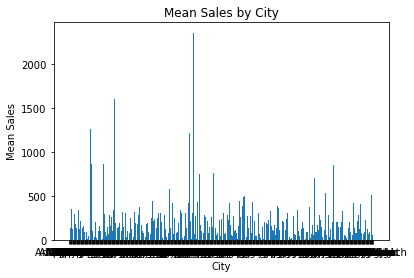

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# create a sample dataframe
data =  pd.read_csv('DataGruppo2.csv', encoding='windows-1252')
df = pd.DataFrame(data)

# group by city and calculate the mean sales
df_mean_sales = df.groupby('City')['Sales'].mean().reset_index()

# create a bar chart
plt.bar(df_mean_sales['City'], df_mean_sales['Sales'])
plt.title('Mean Sales by City')
plt.xlabel('City')
plt.ylabel('Mean Sales')
plt.show()

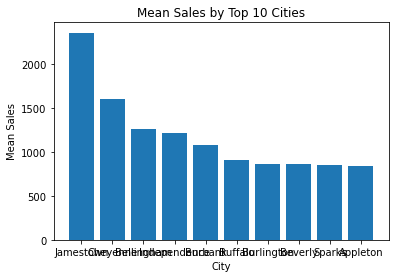

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# create a sample dataframe
data = pd.read_csv('DataGruppo2.csv', encoding='windows-1252')
df = pd.DataFrame(data)

# group by city and calculate the mean sales
df_mean_sales = df.groupby('City')['Sales'].mean().reset_index()

# sort by mean sales in descending order and select top 10 cities
df_top_10 = df_mean_sales.sort_values('Sales', ascending=False).head(10)

# create a bar chart
plt.bar(df_top_10['City'], df_top_10['Sales'])
plt.title('Mean Sales by Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Mean Sales')
plt.show()

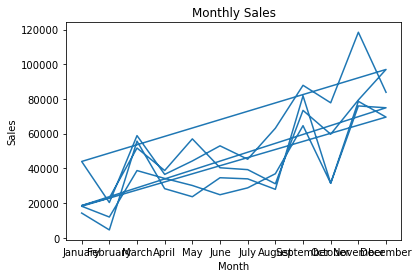

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# create a sample dataframe
data = pd.read_csv('DataGruppo2.csv', encoding='windows-1252')
df = pd.DataFrame(data)
df['Order Date'] = pd.to_datetime(df['Order Date'])
# set the date column as the index
df.set_index('Order Date', inplace=True)

# group by month and calculate the sum of sales
df_monthly_sales = df.groupby(pd.Grouper(freq='M')).sum()

# create a line chart
plt.plot(df_monthly_sales.index.month_name(), df_monthly_sales['Sales'])
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()